# Uninformed Search

Search algorithms which explore the search space without having any information about the problem other than its definition.

In this setting, we assume that the environment is:

- **Observable:** we know the current state
- **Discrete:** finite actions
- **Known:** which state is reached by each action
- **Deterministic:** each action has only one outcome

Under this assumption, and given an initial state, the solution to a problem is a fixed sequence of actions.

# Problem Formulation

Problem formulation is the process of deciding which actions and states to consider, given a goal.

5 components can define a problem:

- The **initial state**
- The possible **actions**: by a function `ACTIONS(s)`
- A **transition model**: returns the state after the action `RESULT(s, a)`
- A **successor function**: returns all possible states from the current one `SUCCESSOR(s)`
The initial state, actions, and transition model implicitly define the **state space** of the problem, the set of all possible states reachable from the initial state. This state forms a **graph** in which nodes are states and links are actions.
- A **goal test**: is the current state a goal? `GOAL_TEST(s)`
The goal can be specified by:
    - an explicit list of goal states
    - an abstract property
- A **cost:** the cost of each step.
The sum of the step cost is the **path cost.**

The problem can be implemented in a single data structure, a class with:

Attributes:
    - initial state: initial state of the problem
    - goal state: configuration of the state that is a goal
    
Methods
    - goal test: if a state is a goal
    - actions: list of possible actions in a given state
    - result: state transition given state and an action
    - successors: all possible state reachable form a given state
    - cost: given a state and an action
    
Usually, the attributes remain the same, while the functions are specifically implemented for a given problem.

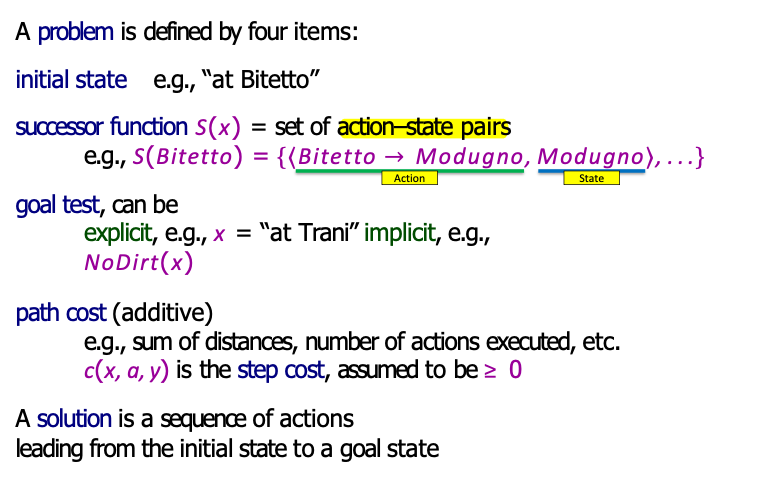

In [1]:
from IPython.display import Image
Image(filename='images/problem.png') 

In [2]:
class Problem:
    def __init__(self, initial_state, goal_state=None):
        self.initial_state = initial_state
        self.goal_state = goal_state

    def successors(self, state):
        pass

    def actions(self, state):
        pass

    def result(self, state, action):
        pass

    def goal_test(self, state):
        if isinstance(self.goal_state, list):
            return state in self.goal_state
        else:
            return state == self.goal_state

    def cost(self, state, action):
        return 1

# Example: Streets Problem

Let's suppose we want to go from Trani to Bari, we need to understand how to formulate a problem. In this case, we can to model the environment (the links between these cities) as a dictionary.

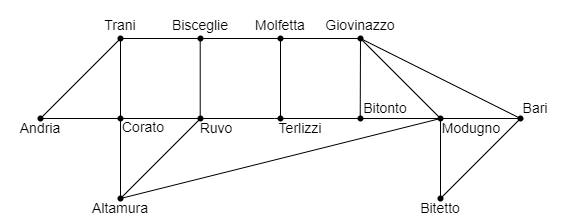

In [3]:
from IPython.display import Image
Image(filename='images/streets_white.png') 

In [4]:
streets = {
    'Andria': {'Corato': 3, 'Trani': 2},
    'Corato': {'Andria': 3, 'Ruvo': 2, 'Trani': 3, 'Altamura': 4},
    'Altamura': {'Corato': 4, 'Ruvo': 3, 'Modugno': 5},
    'Ruvo': {'Corato': 2, 'Bisceglie': 3, 'Terlizzi': 2, 'Altamura': 3},
    'Terlizzi': {'Ruvo': 2, 'Molfetta': 2, 'Bitonto': 2},
    'Bisceglie': {'Trani': 2, 'Ruvo': 3, 'Molfetta': 2},
    'Trani': {'Andria': 2, 'Corato': 3, 'Bisceglie': 2},
    'Molfetta': {'Bisceglie': 2, 'Giovinazzo': 2, 'Terlizzi': 2},
    'Giovinazzo': {'Molfetta': 2, 'Modugno': 3, 'Bari': 2, 'Bitonto': 3},
    'Bitonto': {'Modugno': 3, 'Giovinazzo': 3, 'Terlizzi': 2},
    'Modugno': {'Bitonto': 3, 'Giovinazzo': 3, 'Bari': 2, 'Altamura': 5, 'Bitetto': 1},
    'Bari': {'Modugno': 2, 'Giovinazzo': 2, 'Bitetto': 2},
    'Bitetto': {'Bari': 2, 'Modugno': 1}
}

Given the streets, that in some ways represent a constraints on the actions possible in each state, we can formulate the problem, based on the general formulation given above:

In [5]:
class StreetProblem:
    def __init__(self, initial_state, streets, goal_state=None):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.streets = streets

    def successors(self, state):
        actions = self.actions(state)
        return [(self.result(state, action), action) for action in actions]

    def actions(self, state):
        return self.streets[state].keys()

    def result(self, state, action):
        return action

    def goal_test(self, state):
        if isinstance(self.goal_state, list):
            return state in self.goal_state
        else:
            return state == self.goal_state

    def cost(self, state, action):
        return self.streets[state][action]

Given this formulation of the street problem, we can now try its implementation

In [6]:
problem = StreetProblem(initial_state='Bitetto', goal_state='Trani', streets=streets)
print(problem.actions('Molfetta'))
print(problem.result('Molfetta', 'Giovinazzo'))
print(problem.successors('Molfetta'))
print(problem.cost('Molfetta', 'Giovinazzo'))
print(problem.goal_test('Molfetta'))
print(problem.goal_test('Trani'))

dict_keys(['Bisceglie', 'Giovinazzo', 'Terlizzi'])
Giovinazzo
[('Bisceglie', 'Bisceglie'), ('Giovinazzo', 'Giovinazzo'), ('Terlizzi', 'Terlizzi')]
2
False
True


# Search for a Solution

Having defined a problem, we now need to search for a solution, that is a series of action to reach the goal state. 
The possible sequence of action that an agent simulates form a search tree, that has the initial state as the root. 

The basic idea is that the agent can:
- check if a state is a goal state
- expands each state, generating its successor until it reaches a goal state. 

To do so, we need to maintain some additional data structures:
- the nodes in the tree
- the set of leaf node to expand (called **frontier** or **fringe**)
- a search strategy, to choose which node to expand next

# Infrastructure for search

# Fringe
The list of leaf node to expand can be implemented in a python list, that will be ordered by the given search strategy. 

The operation that we need to do on the fringe are:
- check if its is empty
- remove elements
- add elements

# Node

The nodes in the search tree can be also implemented as a class.

5 components can define a node:

Attributes:
- state
- parent
- action
- cost
- depth

More than one node can have the same state, since it is only used to keep track of the search. (the state is the representation of a physical configuration of the environment).

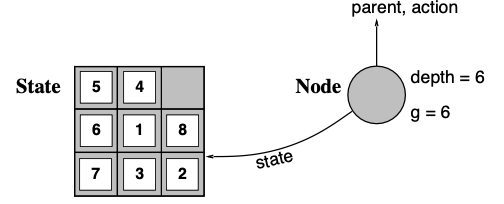

In [7]:
from IPython.display import Image
Image(filename='images/node.png') 

A node has also some "helper" methods:
- solution: since the solutions is a sequence of actions we need to traverse the tree, back from the goal state to the parent, and retrieve the actions to reach such a state.
- expand: create new nodes using the successor function of the problem (NB: the successor functions gives the states, and the actions, while expands create a new node for each state, action pairs).

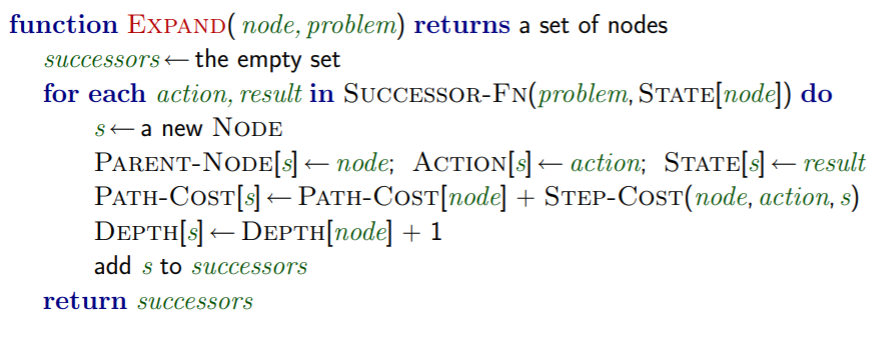

In [8]:
from IPython.display import Image
Image(filename='images/expand.png') 

In [9]:
class Node:
    def __init__(self, state, cost=0, parent=None, action=None, depth=0):
        self.state = state
        self.cost = cost
        self.parent = parent
        self.action = action
        self.depth = depth

    def __repr__(self):
        return str(self.state)

    def expand(self, problem):
        new_states = problem.successors(self.state)
        return [Node(state=state, cost=self.cost + problem.cost(self.state, action),
                     parent=self, action=action, depth=self.depth + 1) for state, action in new_states]

    def solution(self):
        path = []
        node = self

        while node.parent:
            path.append(node.action)
            node = node.parent

        return path[::-1]


Given the definition of a node, we can now try its implementation.

In [10]:
node = Node(state='Trani')

new_nodes = node.expand(problem)
print(new_nodes)
print(new_nodes[0].solution())

[Andria, Corato, Bisceglie]
['Andria']


# Search Implementation

## Tree Search

As we know the tree search takes in input a search problem (and a strategy) and returns a solution.
Also, the general tree search can be implemented as a class, with:

Attributes:
    - problem
    - strategy
    - fringe
    
and only one method `RUN` that implements the algorithm, as shown in the pseudocode.


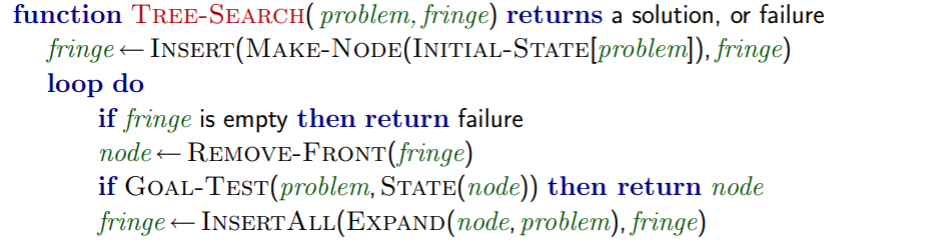

In [11]:
from IPython.display import Image
Image(filename='images/tree_search.png') 

In [12]:
class TreeSearch:
    def __init__(self, problem, strategy):
        self.problem = problem
        self.strategy = strategy
        self.fringe = []
        
    def run(self):
        self.fringe += [Node(self.problem.initial_state)]
        
        while True:
            if len(self.fringe) == 0:
                return 'fail', []
            
            self.fringe, node = self.strategy.select(self.fringe)
            
            if node is None:
                return 'fail', []
            
            
            if self.problem.goal_test(node.state):
                return 'success', node.solution()
            
            self.fringe += node.expand(self.problem)

Also, the search strategies can be implemented as their own class, with the method `SELECT(fringe)`.

For example, we can implement a random strategy in this way:

In [13]:
import random

class RandomStrategy:
    def select(self, fringe):
        random.shuffle(fringe)
        return fringe, fringe.pop(0)
    
# NB: list.pop(pos) -> pos is optional. A number specifying the position of the element you want to remove, default value is -1, which returns the last item.

and run the search:

In [14]:
problem = StreetProblem('Bitetto', streets, 'Trani')
search = TreeSearch(problem, RandomStrategy())
random.seed(100)
print(search.run())

('success', ['Modugno', 'Bitonto', 'Giovinazzo', 'Molfetta', 'Bisceglie', 'Trani'])


## Graph Search

Since some search strategies are not complete if we have repeated states (we can go into infinite loop), we can implement a variant of the tree search, called graph search. 
In this algorithm we maintain a list of already explored states.

NB: in the pseudocode the check if the state is already in the fringe is missing!

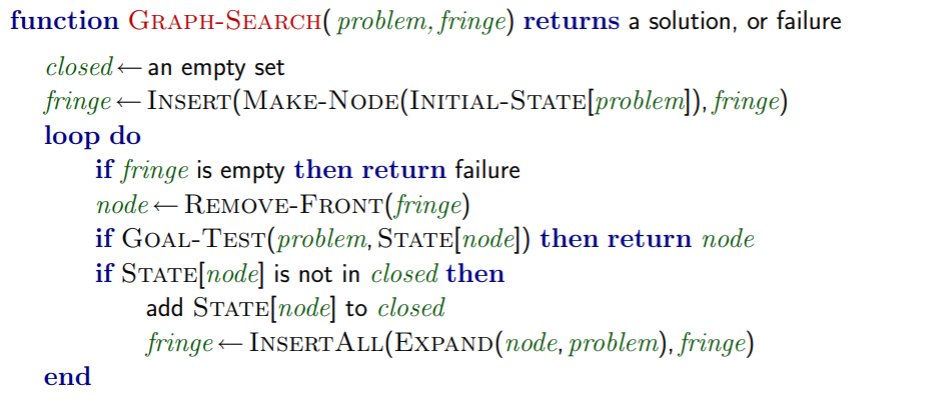

In [15]:
from IPython.display import Image
Image(filename='images/graph_search.png') 

In [16]:
class GraphSearch:
    def __init__(self, problem, strategy):
        self.problem = problem
        self.strategy = strategy
        self.fringe = []
        self.explored = []
        
    def run(self):
        self.fringe += [Node(self.problem.initial_state)]
        
        while True:
            if len(self.fringe) == 0:
                return 'fail', []
            
            self.fringe, node = self.strategy.select(self.fringe)
            
            if node is None:
                return 'fail', []
            
            if self.problem.goal_test(node.state):
                return 'success', node.solution()
            
            if node.state not in self.explored:
                self.explored += [node.state]
            
                fringe_states = [node.state for node in self.fringe]
                self.fringe += [new_node for new_node in node.expand(self.problem) if new_node.state not in fringe_states]
            

we can run the graph search:

In [17]:
problem = StreetProblem('Bitetto', streets, 'Trani')
search = GraphSearch(problem, RandomStrategy())
random.seed(100)
print(search.run())

('success', ['Modugno', 'Altamura', 'Corato', 'Trani'])


# Uninformed Search Strategies

This type of strategy has no additional information and can only generate successors and test for goals. They differ in the order of expansion.

## Breadth-fist Search
Expand all the nodes at the same depth. This is implemented by a FIFO queue.

- Complete: if b finite
- Optimal: if the path cost is a non-decreasing function of the depth
- Time: $O(b^{d+1})$
- Space: $O(b^{d+1})$

NB: by checking the nodes when generated rather than expanded, we can reduce the complexity by 1 factor in the exponential.

The exponential time and space complexity make most problems unfeasible.

In [18]:
class BreadthFirstSearch:
    def select(self, fringe): 
        return fringe, fringe.pop(0)

## Uniform-cost Search

Expand first node with a lesser path cost $g(n)$. This is implemented by a priority queue.

- Complete: if every step cost is greater than a small epsilon
- Optimal: yes
- Time: $O(b^{1+\frac{C*}{\epsilon}})$
- Space: $O(b^{1+\frac{C*}{\epsilon}})$

In [19]:
class UniformCostSearch:
    def select(self, fringe):
        fringe = sorted(fringe, key=lambda node: node.cost, reverse=True)
        return fringe, fringe.pop()

Depth-fist Search

Expand first the deepest node. This is implemented as a LIFO queue.

- Complete: only the graph version and the space is finite
- Optimal: no
- Time: $O(b^m)$ with m the maximum depth
- Space: $O(bm)$ because at any given time we have in memory only the current branch

Since the space requirement is linear, depth first is widely adopted in AI.

In [20]:
class DepthFirstSearch:
    def select(self, fringe):
        return fringe, fringe.pop()

### Depth-limited Search

It’s a variant of depth-fist in witch only nodes until depth $l$ are expanded.

- Complete: no if l<d
- Optimal: no if l>d
- Time: $O(b^l)$
- Space: $O(bl)$ because at any given time we have in memory only the current branch

In [21]:
class DepthLimitedSearch:
    def __init__(self, limit):
        self.limit = limit
        
    def select(self, fringe):
        fringe = [node for node in fringe if node.depth <= self.limit]
        return fringe, fringe.pop()

now we can try:

In [22]:
problem = StreetProblem('Bitetto', streets, 'Trani')
search = GraphSearch(problem, BreadthFirstSearch())
print(search.run())
search = GraphSearch(problem, UniformCostSearch())
print(search.run())
search = GraphSearch(problem, DepthFirstSearch())
print(search.run())
search = GraphSearch(problem, DepthLimitedSearch(2))
print(search.run())

('success', ['Modugno', 'Altamura', 'Corato', 'Trani'])
('success', ['Modugno', 'Giovinazzo', 'Molfetta', 'Bisceglie', 'Trani'])
('success', ['Modugno', 'Altamura', 'Ruvo', 'Bisceglie', 'Trani'])
('fail', [])


# Recursion
Technique in which a function call itself to resolve sub-problem of the same type.

The general structure has two parts:
- Base case: the condition that end the recursion
- Recursive step: recursive call on a reduced version of the problem

Example: factorial

In [23]:
def recursive_factorial(n):
    if n == 0:
        return 1
    return n * recursive_factorial(n-1)

def iterative_factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

print(recursive_factorial(10))
print(iterative_factorial(10))   

3628800
3628800


Try to compute the sum of a list with a recursive approach. 

# Recursive Implementation

Depth-based strategy can also be implemented as a recursive function.


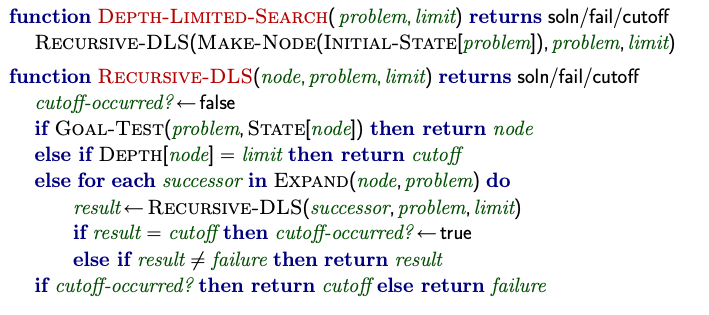

In [24]:
from IPython.display import Image
Image(filename='images/recursive.png') 

In [25]:
class RecursiveDepthFirst:
    def __init__(self, problem):
        self.problem = problem
        
    def recursive_depth_first(self, node):
        if self.problem.goal_test(node):
            return node
        
        for child in node.expand(self.problem):
            result = self.recursive_depth_first(child)
            if result is not None:
                return result
        
    def run(self):
        node = Node(self.problem.initial_state)
        return self.recursive_depth_first(node)

In [26]:
class RecursiveDepthLimited:
    def __init__(self, problem, limit):
        self.problem = problem
        self.limit = limit
        
    def recursive_depth_first(self, node, limit):
        if self.problem.goal_test(node):
            return node
        
        if limit == 0:
            return 'cutoff'
        
        for child in node.expand(self.problem):
            result = self.recursive_depth_first(child, limit-1)
            if result is not None:
                return result
        
    def run(self):
        node = Node(self.problem.initial_state)
        return self.recursive_depth_first(node, self.limit)

now we can try our implementation:

In [27]:
problem = StreetProblem('Bitetto', streets, 'Trani')
search = RecursiveDepthLimited(problem, 10)
print(search.run())

cutoff


In [28]:
problem = StreetProblem('Bitetto', streets, 'Trani')
search = RecursiveDepthFirst(problem)
# print(search.run())

## Example: Eight Puzzle

In the streets problem that we have seen, the actions corresponds directly to the state, The state space uses an explicit representation, the environment that the problem has is the explicit graph. 
In other problem, like the eight puzzle, is better to define the state space by an implicit representation. We don't have directly the graph, but we dynamically construct it via the actions.


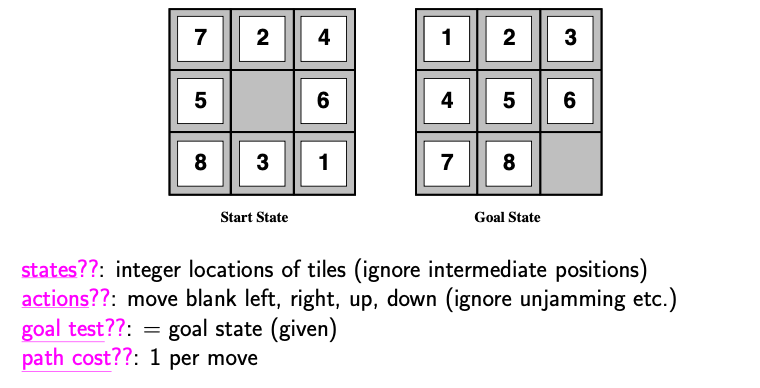

In [29]:
from IPython.display import Image
Image(filename='images/8puzzle.png') 

In [30]:
import copy

class EightTilesProblem:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state

    def successors(self, state):
        actions = self.actions(state)
        return [(self.result(state, action), action) for action in actions]

    def result(self, state, action):
        new_state = copy.deepcopy(state)
        pos = new_state.index(0)
        row = pos // 3
        col = pos % 3

        new_row, new_col = row, col

        if action == 'up':
            new_row = row - 1
        if action == 'down':
            new_row = row + 1
        if action == 'left':
            new_col = col - 1
        if action == 'right':
            new_col = col + 1

        new_pos = new_row * 3 + new_col

        new_state[new_pos], new_state[pos] = state[pos], state[new_pos]

        return new_state

    def actions(self, state):
        index = state.index(0)
        row = index / 3
        col = index % 3

        actions = ['up', 'down', 'left', 'right']

        if row < 1:
            actions.remove('up')
        if row >= 2:
            actions.remove('down')
        if col < 1:
            actions.remove('left')
        if col >= 2:
            actions.remove('right')

        return actions
    
    def cost(self, state, action):
        return 1

    def goal_test(self, state):
        return self.goal_state == state


we can now try our implementation of the problem:

In [31]:
# problem = EightTilesProblem([4, 2, 5, 8, 0, 3, 7, 6, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8])
problem = EightTilesProblem([1, 2, 3, 4, 0, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8])
search = GraphSearch(problem, BreadthFirstSearch())
print(search.run())

('success', ['left', 'up', 'right', 'right', 'down', 'left', 'up', 'left', 'down', 'right', 'right', 'up', 'left', 'left'])


## Goal Formulation

The same distinction can be done when defining a goal:

- Explict Goal: we give directly a goal state
- Implicit Goal: the state need to meet the given constraints

The second type of goal definition is more similar at the one we have in a CSP (that indeed uses a modified version of depht-fist).